In [30]:
# imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import re
import pickle
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import joblib

In [31]:
# imputer = pickle.load(open("imputer.pkl", 'rb'))
# scaler = pickle.load(open("scaler.pkl", 'rb'))
# clf = pickle.load(open("lr.sav", 'rb'))

imputer = joblib.load("imputer.pkl")
scaler = joblib.load("scaler.pkl")
clf = joblib.load("lr.sav")

In [33]:
def plot_confusion_matrix(test_y, predict_y):
    
    result = dict()
    
    C = confusion_matrix(test_y, predict_y)
    misclassified_points = round(((len(test_y)-np.trace(C))/len(test_y)*100),2)
    result['misclassified points'] = misclassified_points
    print("Number of misclassified points {}%".format(misclassified_points))
    fp = (int)(C[0][1])
    fn = (int)(C[1][0])
    result['False positive'] = fp
    result['False negative'] = fn
    print('Number of False Positives: ', fp)
    print('Number of False Negatives: ', fn)
    cost = (10 * fp) + (500 * fn)
    result['cost'] = cost
    print('Total Cost (cost1+cost2): ', cost)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [53]:
def predict(X):
    """Give APS prediction for a input list/vector of features"""
    # Load files
    imputer = joblib.load("imputer.pkl")
    scaler = joblib.load("scaler.pkl")
    clf = joblib.load("lr.sav")

    X = np.array(X)
    # Check input length
    if len(X) != 170:
        raise Exception('Please pass valid input. Some values are missing.')
    # Replace non-numeric values with NaN
    X.astype('<U32')
    #Refer: https://stackoverflow.com/questions/16223483/forced-conversion-of-non-numeric-numpy-arrays-with-nan-replacement
    X = np.genfromtxt(X)
    # For a single input, shape should be (1, 170)
    X = X.reshape(1,-1)
    # Replace the missing values using saved imputers if present
    X = imputer.transform(X)
    #Standardize the data
    X = scaler.transform(X)
    # Remove the column with constant value ('cd_000') index= 89
    X = np.delete(X, 89,1)
    # Predict Y values with logistic regression as classifier
    y_pred = clf.predict(X)[0]
    # Label the predicted Y values back into 'pos' and 'neg'
    y_label = 'pos' if y_pred == 1 else 'neg'
    return (y_pred, y_label)

In [54]:
ip = '80168	0	2130706432	750	0	0	0	0	0	0	130496	3162754	1377886	565290	215870	57866	2477100	2128	0	0	2094	3542	4685450	3955284	997310	670944	0	0	21624	0	608	1626	0	0	0	0	0	0	1970	3078298	2429894	0	1972	1046	1952	2754	9582	766796	4726060	0	0	0	2821960	727962	492650	275048	194472	148276	132144	156248	199810	361592	5685430	8016	13500	6236	0	2477100	77544	343654	648636	188200	190840	250460	232940	na	na	na	na	127140	80167.5	5685430	5685430	5645238	29748	630	79524	839620	5545388	1209600	131776	2	136	0	3975910.08	730133.76	834512.64	22	398	0	0	3418	200942	1215086	2296480	1078288	536102	177032	2814	0	8	5685430	0	5346	662	852430	189804	1209080	3079676	162888	10240	36	0	452	2366	3331202	1942354	0	2050	0	0	3997858	3646	1796	690	204232	10	721070	0	0	0	0	38710	17030	6838	12464926	1409108	126236	18378	15334840	1551906	5565480	103564	12	32	31126970	14.3	1522	1594978	536428	347962	163746	306512	331030	495060	1643376	91036	34	2	12'
ip_list = ip.replace('\t', ',').split(',')
predict(ip_list)

(1, 'pos')

In [58]:
def checkPerformance(X, y):
    """For a given set of X and y values, predict and check model performance"""
    #Convert X (list of list) and y(list) to arrays 
    X = np.array(X)
    #Convert Y values ('pos', 'neg' to 1 and 0)
    y = [1 if i == 'pos' else 0 for i in y]
    y = np.array(y)
    size = X.shape[0]
    # Predict for each data points using the selected classifier
    y_preds = []
    y_labels = []
    for i in range(size):
        y_pred, y_label = predict(X[i])
        y_preds.append(y_pred)
        y_labels.append(y_label)
    
    # Plot confusion matrix with precision and recall
    plot_confusion_matrix(y, y_preds)
    print('log-loss: ', round(log_loss(y, y_preds), 4))
    
    return y_labels

In [1]:
ip1 = '1055714	na	na	na	0	0	0	0	0	130	196186	10992134	41971684	13090340	141034	468	22822190	24374	56	na	570	1710	54813266	48131824	14718716	5591650	0	0	624	0	0	0	0	0	0	0	0	566136	29340102	32671856	3813882	0	82972	111650	206676	398768	11570846	53976512	44492	48	8	4	23901562	13499284	5901996	4743554	4116854	4340282	6836950	1824468	326508	900518	69540186	0	0	0	2	22822190	800108	6878996	7734920	442760	268680	313100	324440	350620	356740	276500	267240	107380	1055713.32	69540180	69540186	68775664	425324	21062	na	454740	66391976	1209600	0	na	na	na	57985392.96	0	8332377.6	0	0	0	0	36968	2952154	27731700	31582938	3559722	420282	101774	6438	na	0	69540186	na	51768	10574	5186458	3622180	14096806	41581596	1836974	5620	0	0	na	na	na	na	na	na	na	na	na	102	6	na	na	na	na	na	na	na	na	426200	1860	500	0	0	6398	740	476860	133450	0	0	0	0	na	18371.36	22968	8667474	11120294	7651830	3968726	9587618	8521170	6513690	3988408	6064958	307808	0	0'
y1 = 'pos'
X1 = ip1.replace('\t', ',').split(',')
ip2 = '453634	na	na	na	0	0	0	0	0	5388	1141808	18432608	38148000	17369124	2088576	88388	30523274	10426506	0	na	37278	115674	41643906	21628104	41071454	17408518	na	0	28714	0	0	0	0	0	0	0	0	665712	22303284	54244750	60146	0	71362	23432	39362	336572	34788380	41874200	140416	132	24	12	39117688	9663396	5301866	4567844	4331220	4914764	6565022	2796672	15420	0	82772208	na	na	4132	6912	30523274	1833348	11871020	29064524	895560	965280	955060	927440	836220	800240	899080	809800	199260	453634.08	82772208	82772208	80556044	451774	na	na	279320	77273892	1209600	0	na	na	na	56456064.96	0	20646225.6	0	0	0	0	88028	3225836	21259780	34341712	15650858	2422018	276734	8926	na	na	82772208	na	96632	24904	8086566	13213386	16445722	37135570	2252634	18466	12	0	na	na	na	na	na	na	na	na	na	113892	na	na	na	na	na	na	na	na	na	1578748	na	na	na	na	na	na	na	na	na	na	na	na	na	37446.94	50584	21156752	43044162	7918426	1658674	2033932	1126362	276634	41488	17394	68	na	na'
y2 = 'pos'
X2 = ip2.replace('\t', ',').split(',')
ip3 = '351266	na	na	na	na	na	17706	192868	704464	3439760	7939556	8467710	1901626	292474	17008	0	43554	0	0	0	0	0	115812	105230	30304	7524	na	0	0	0	na	na	0	0	0	0	0	374990	1103258	8148088	13344320	2516	138322	140482	270528	841356	12731528	8850342	540	74	0	0	5953302	6732004	2876484	1762286	1188492	933772	1046420	2439248	41130	34	146166	na	na	na	na	43554	1674	14174	15768	na	na	na	na	na	na	na	na	na	351266.73	146148	146148	na	154748	na	14396	na	na	na	na	na	na	na	17923140.48	0	5056028.16	na	na	244758	1263190	3845398	8901976	6733990	1780800	173036	26416	3588	20	na	na	146148	na	15062	2956	2101314	2320230	3427000	14957558	149052	0	0	0	9984	14500	1054200	4338372	478	1369426	0	0	16356546	na	na	na	na	na	na	na	na	na	na	744	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	5135752	2015448	2307372	1462646	2791816	2019786	1735650	5210746	293886	70	na	na'
y3 = 'pos'
X3 = ip3.replace('\t', ',').split(',')
ip4 = '48746	na	80	74	0	0	na	na	na	na	na	na	na	na	na	na	1811838	53100	62	0	0	0	3167504	2606538	963682	419766	0	0	0	0	186	682	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	na	4133070	1708	1196	1938	0	1811838	78674	378340	580340	309680	235160	299780	na	na	na	na	na	103100	48746.88	4133070	4133070	4177444	14042	106	39076	488140	3820042	1209600	196318	0	172	0	3233813.76	0	579966.72	32	1828	na	na	na	na	na	na	na	na	na	na	80	92	4133070	na	na	na	na	na	na	na	na	na	na	na	62	720	3166092	455534	0	1718	0	0	3271922	6106	2088	0	0	0	0	0	0	0	0	40734	3988	478	0	0	215272	37454	9600	964	0	0	0	0	8746860	4200.3	3764	na	na	na	na	na	na	na	na	na	na	0	0'
y4 = 'neg'
X4 = ip4.replace('\t', ',').split(',')
ip5 = '268	4	118	96	0	0	0	0	0	0	1062	17980	18620	0	0	0	16856	0	124	0	0	0	30050	17150	59344	6338	0	0	0	0	22	60	0	0	0	0	0	0	0	27312	10350	0	262	158	232	358	1216	2840	32596	0	0	0	29278	3944	2138	974	414	248	412	94	108	52	89442	8	10	82	0	16856	542	44552	13866	na	na	na	na	na	na	na	na	58440	267.2	89442	89442	86714	103	0	8472	88680	37780	1209600	1084	0	4	0	15628.8	4413.12	16689.6	4	70	0	0	0	9020	25586	2334	692	30	0	0	12	16	89442	0	1178	64	226	2634	5196	11376	14924	2034	28	2	100	120	16080	5710	0	0	0	0	16188	116	70	0	0	210	5104	0	0	0	0	658	0	0	10650	1694	546	104	160	18	86034	30	0	0	0	215.36	138	22298	4554	1206	304	782	1004	3320	4192	2	0	0	0'
y5 = 'neg'
X5 = ip5.replace('\t', ',').split(',')
ip6 = '3300	na	2130706444	114	0	0	0	0	0	0	134	354	172210	10348	0	0	84424	0	0	0	0	0	184184	168610	58334	10034	0	0	0	0	204	56	0	0	0	0	0	3160	137840	42046	0	0	616	282	156	1068	8702	172214	8	0	0	0	61860	77810	26538	13156	3090	368	194	30	0	0	242564	10	434	166	0	84424	1678	47892	10386	na	na	na	na	na	na	na	na	57960	3299.88	242564	242564	243494	789	0	23988	242040	183046	1209600	3024	2	2	0	167380.8	0	15500.16	4	62	0	0	0	0	102866	77240	2092	662	186	0	2	8	242564	na	390	74	5658	7822	2862	91916	72268	2012	44	0	226	182	168464	124962	0	12	0	18	168514	146	28	0	0	0	0	0	0	0	0	1062	270	348	0	0	1760	444	1024700	102492	0	0	0	0	2299890	492.84	122	16926	14988	7386	4230	24660	113406	1420	30	0	0	0	0'
y6 = 'neg'
X6 = ip6.replace('\t', ',').split(',')

In [2]:
X1

['1055714',
 'na',
 'na',
 'na',
 '0',
 '0',
 '0',
 '0',
 '0',
 '130',
 '196186',
 '10992134',
 '41971684',
 '13090340',
 '141034',
 '468',
 '22822190',
 '24374',
 '56',
 'na',
 '570',
 '1710',
 '54813266',
 '48131824',
 '14718716',
 '5591650',
 '0',
 '0',
 '624',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '566136',
 '29340102',
 '32671856',
 '3813882',
 '0',
 '82972',
 '111650',
 '206676',
 '398768',
 '11570846',
 '53976512',
 '44492',
 '48',
 '8',
 '4',
 '23901562',
 '13499284',
 '5901996',
 '4743554',
 '4116854',
 '4340282',
 '6836950',
 '1824468',
 '326508',
 '900518',
 '69540186',
 '0',
 '0',
 '0',
 '2',
 '22822190',
 '800108',
 '6878996',
 '7734920',
 '442760',
 '268680',
 '313100',
 '324440',
 '350620',
 '356740',
 '276500',
 '267240',
 '107380',
 '1055713.32',
 '69540180',
 '69540186',
 '68775664',
 '425324',
 '21062',
 'na',
 '454740',
 '66391976',
 '1209600',
 '0',
 'na',
 'na',
 'na',
 '57985392.96',
 '0',
 '8332377.6',
 '0',
 '0',
 '0',
 '0',
 '36968',
 '2952154',
 '2

In [3]:
X2

['453634',
 'na',
 'na',
 'na',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5388',
 '1141808',
 '18432608',
 '38148000',
 '17369124',
 '2088576',
 '88388',
 '30523274',
 '10426506',
 '0',
 'na',
 '37278',
 '115674',
 '41643906',
 '21628104',
 '41071454',
 '17408518',
 'na',
 '0',
 '28714',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '665712',
 '22303284',
 '54244750',
 '60146',
 '0',
 '71362',
 '23432',
 '39362',
 '336572',
 '34788380',
 '41874200',
 '140416',
 '132',
 '24',
 '12',
 '39117688',
 '9663396',
 '5301866',
 '4567844',
 '4331220',
 '4914764',
 '6565022',
 '2796672',
 '15420',
 '0',
 '82772208',
 'na',
 'na',
 '4132',
 '6912',
 '30523274',
 '1833348',
 '11871020',
 '29064524',
 '895560',
 '965280',
 '955060',
 '927440',
 '836220',
 '800240',
 '899080',
 '809800',
 '199260',
 '453634.08',
 '82772208',
 '82772208',
 '80556044',
 '451774',
 'na',
 'na',
 '279320',
 '77273892',
 '1209600',
 '0',
 'na',
 'na',
 'na',
 '56456064.96',
 '0',
 '20646225.6',
 '0',
 '0',
 '0',
 '0',
 '88028',


In [4]:
X3

['351266',
 'na',
 'na',
 'na',
 'na',
 'na',
 '17706',
 '192868',
 '704464',
 '3439760',
 '7939556',
 '8467710',
 '1901626',
 '292474',
 '17008',
 '0',
 '43554',
 '0',
 '0',
 '0',
 '0',
 '0',
 '115812',
 '105230',
 '30304',
 '7524',
 'na',
 '0',
 '0',
 '0',
 'na',
 'na',
 '0',
 '0',
 '0',
 '0',
 '0',
 '374990',
 '1103258',
 '8148088',
 '13344320',
 '2516',
 '138322',
 '140482',
 '270528',
 '841356',
 '12731528',
 '8850342',
 '540',
 '74',
 '0',
 '0',
 '5953302',
 '6732004',
 '2876484',
 '1762286',
 '1188492',
 '933772',
 '1046420',
 '2439248',
 '41130',
 '34',
 '146166',
 'na',
 'na',
 'na',
 'na',
 '43554',
 '1674',
 '14174',
 '15768',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '351266.73',
 '146148',
 '146148',
 'na',
 '154748',
 'na',
 '14396',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '17923140.48',
 '0',
 '5056028.16',
 'na',
 'na',
 '244758',
 '1263190',
 '3845398',
 '8901976',
 '6733990',
 '1780800',
 '173036',
 '26416',
 '3588',
 '20',
 'na',
 'na'

In [5]:
X4

['48746',
 'na',
 '80',
 '74',
 '0',
 '0',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '1811838',
 '53100',
 '62',
 '0',
 '0',
 '0',
 '3167504',
 '2606538',
 '963682',
 '419766',
 '0',
 '0',
 '0',
 '0',
 '186',
 '682',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '4133070',
 '1708',
 '1196',
 '1938',
 '0',
 '1811838',
 '78674',
 '378340',
 '580340',
 '309680',
 '235160',
 '299780',
 'na',
 'na',
 'na',
 'na',
 'na',
 '103100',
 '48746.88',
 '4133070',
 '4133070',
 '4177444',
 '14042',
 '106',
 '39076',
 '488140',
 '3820042',
 '1209600',
 '196318',
 '0',
 '172',
 '0',
 '3233813.76',
 '0',
 '579966.72',
 '32',
 '1828',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '80',
 '92',
 '4133070',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '62',
 '

In [6]:
X5

['268',
 '4',
 '118',
 '96',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1062',
 '17980',
 '18620',
 '0',
 '0',
 '0',
 '16856',
 '0',
 '124',
 '0',
 '0',
 '0',
 '30050',
 '17150',
 '59344',
 '6338',
 '0',
 '0',
 '0',
 '0',
 '22',
 '60',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '27312',
 '10350',
 '0',
 '262',
 '158',
 '232',
 '358',
 '1216',
 '2840',
 '32596',
 '0',
 '0',
 '0',
 '29278',
 '3944',
 '2138',
 '974',
 '414',
 '248',
 '412',
 '94',
 '108',
 '52',
 '89442',
 '8',
 '10',
 '82',
 '0',
 '16856',
 '542',
 '44552',
 '13866',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '58440',
 '267.2',
 '89442',
 '89442',
 '86714',
 '103',
 '0',
 '8472',
 '88680',
 '37780',
 '1209600',
 '1084',
 '0',
 '4',
 '0',
 '15628.8',
 '4413.12',
 '16689.6',
 '4',
 '70',
 '0',
 '0',
 '0',
 '9020',
 '25586',
 '2334',
 '692',
 '30',
 '0',
 '0',
 '12',
 '16',
 '89442',
 '0',
 '1178',
 '64',
 '226',
 '2634',
 '5196',
 '11376',
 '14924',
 '2034',
 '28',
 '2',
 '100',
 '120',
 '16080',
 '5710',
 '0',
 '

In [7]:
X6

['3300',
 'na',
 '2130706444',
 '114',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '134',
 '354',
 '172210',
 '10348',
 '0',
 '0',
 '84424',
 '0',
 '0',
 '0',
 '0',
 '0',
 '184184',
 '168610',
 '58334',
 '10034',
 '0',
 '0',
 '0',
 '0',
 '204',
 '56',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3160',
 '137840',
 '42046',
 '0',
 '0',
 '616',
 '282',
 '156',
 '1068',
 '8702',
 '172214',
 '8',
 '0',
 '0',
 '0',
 '61860',
 '77810',
 '26538',
 '13156',
 '3090',
 '368',
 '194',
 '30',
 '0',
 '0',
 '242564',
 '10',
 '434',
 '166',
 '0',
 '84424',
 '1678',
 '47892',
 '10386',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 'na',
 '57960',
 '3299.88',
 '242564',
 '242564',
 '243494',
 '789',
 '0',
 '23988',
 '242040',
 '183046',
 '1209600',
 '3024',
 '2',
 '2',
 '0',
 '167380.8',
 '0',
 '15500.16',
 '4',
 '62',
 '0',
 '0',
 '0',
 '0',
 '102866',
 '77240',
 '2092',
 '662',
 '186',
 '0',
 '2',
 '8',
 '242564',
 'na',
 '390',
 '74',
 '5658',
 '7822',
 '2862',
 '91916',
 '72268',
 '2012',
 '44',
 '0',
 '226',
 '18

Number of misclassified points 0.0%
Number of False Positives:  0
Number of False Negatives:  0
Total Cost (cost1+cost2):  0


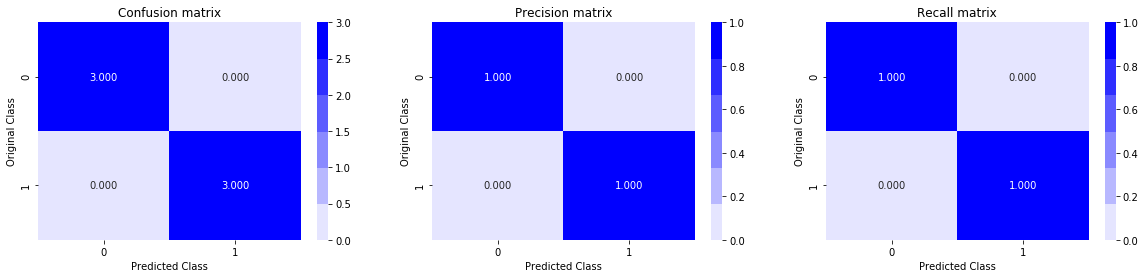

log-loss:  0.0


['pos', 'pos', 'pos', 'neg', 'neg', 'neg']

In [60]:
X = [X1,X2,X3,X4,X5,X6]
y = [y1,y2,y3,y4,y5,y6]
checkPerformance(X, y)

We are perfectly classified data points from test set. More data points can be used to test the performance.